#### [1. Overview](#1)
#### [2. Import Data](#2)
#### [3. Power Analysis](#3)
#### [4. Testing](#4)
- [4.1 One Way ANOVA](#4.1)
- [4.2 Permutation Testing](#4.2)
- [4.3 Chi-squared Test for Independence](#4.3)
#### [5. Industry-Specific Testing](#5)
- [5.1 Two Way ANOVA](#5.1)
- [5.2 Individual One Way ANOVA](#5.2)
- [5.3 Permutation Testing — Pairwise Mean Differences](#5.3)
#### [6. Summary](#6)

### 1. Overview <a id='1'></a>
#### <span style="background-color: #000000">Statistical Experiment: Job level and Correlation </span>
- After extracting out the features of the data before, I noticed that very interestingly job (management) level and employee satisfaction are not correlated (via Pearsons)
- However, Pearson's correlation alone is not a good gauge of there is a relationship between our data, it mainly measures linear strength
    - We can potentially have Minimal Correlation but Significant ANOVA Results (focuses more on group summary statistic differences, group differences)
- I will be conducting a hypothesis test to better understand the relationship.

#### Permutation test:
Looking into the 3 experiment groups, we will analyze if being in different management levels effect employee satisfaction to see whether there are significant differences between the means of our three independent groups, so if one level has a significantly different mean satisfaction score.

Null Hypothesis `𝐻0`: Assumes all level means are equal.

Alternative Hypothesis `𝐻1` : Assumes at least one level is different

### 2. Import Data<a id='2'></a>

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('/Users/Andre/OneDrive/Desktop/1_Glassdoor_Project/CleanedData/clean_data_2.csv')
df.head(5)

,industry,firm,job_title,level,status,years,location,overall_rating,work_life_balance,culture_values,...,comp_benefits,senior_mgmt,headline,pros,cons,combined_text,processed_text,word_count,char_count,sentiment_score
0,Retail,ASDA,Night Stocker,1,0.0,1.0,"Glasgow, Scotland, Scotland",3,3.0,2.0,...,3.0,2.0,"Mixed, it very much depends upon the Skills of...",If you live nearby and are physically sound t...,Multi skills or greater performance are not fi...,"Mixed, it very much depends upon the Skills of...",mixed depend Skills Manager seriously absent c...,48,358,0.8692
1,Retail,ASDA,Warehouse Operative,2,1.0,10.0,"London, England, England",5,5.0,5.0,...,5.0,5.0,"very good the freshness,good,support,freedom a...","the freshness,good,support,freedom and attitude",nothing nothing nothing nothing nothing nothing,"very good the freshness,good,support,freedom a...",good freshness good support freedom attitude...,11,88,0.4927
2,Retail,ASDA,Availibility,2,1.0,1.0,"London, England, England",3,3.0,2.0,...,3.0,2.0,"Good company, cares about employees...",Helpful and friendly working environment,Salary is not attractive compare to the curren...,"Good company, cares about employees... Helpful...",good company care employee helpful friendly wo...,13,101,0.8589
3,Retail,ASDA,Customer Service Assistant,1,1.0,5.0,"Glasgow, Scotland, Scotland",3,5.0,4.0,...,2.0,4.0,"Good culture, Great group of people to work wi...","Easy work, good training, 10% off discount car...","Career progression slow, with many people sitt...","Good culture, Great group of people to work wi...",good culture great group people work career pr...,52,353,0.9268
4,Retail,ASDA,Checkout Support,1,1.0,1.0,"Cardiff, Wales, Wales",5,4.0,5.0,...,4.0,5.0,Working in asda,I have felt like i was working among my family...,I can't really think of any .,Working in asda I have felt like i was working...,work asda feel like work family work think,8,42,0.3612


In [8]:
df_level = df.drop(labels=['location', 'status', 'years', 'work_life_balance', 'culture_values','career_opp', 'comp_benefits', 'senior_mgmt',
                           'headline', 'pros', 'cons', 'combined_text', 'processed_text', 'word_count', 'char_count', 'sentiment_score'], axis=1)
df_level

,industry,firm,job_title,level,overall_rating
0,Retail,ASDA,Night Stocker,1,3
1,Retail,ASDA,Warehouse Operative,2,5
2,Retail,ASDA,Availibility,2,3
3,Retail,ASDA,Customer Service Assistant,1,3
4,Retail,ASDA,Checkout Support,1,5
...,...,...,...,...,...
242750,Consulting,Willis-Towers-Watson,Senior Analyst,3,5
242751,Consulting,Willis-Towers-Watson,Business Analysis Senior Analyst,3,4
242752,Consulting,Willis-Towers-Watson,Senior Associate,3,4
242753,Consulting,Willis-Towers-Watson,Director,3,5


In [9]:
df_count = df_level.groupby('industry').nunique()
df_count

,firm,job_title,level,overall_rating
industry,,,,
Consulting,9,6610,3,5
Consumer Goods,1,822,3,5
Education,2,1156,3,5
Financial Services,10,8102,3,5
Food,2,1217,3,5
Healthcare,1,757,3,5
Hospitality,3,1976,3,5
Media,2,1552,3,5
Pharmaceuticals,1,856,3,5


In [10]:
df_level.describe()

,level,overall_rating
count,242755.000000,242755.000000
mean,2.104332,3.734119
std,0.647819,1.129840
min,1.000000,1.000000
25%,2.000000,3.000000
50%,2.000000,4.000000
75%,3.000000,5.000000
max,3.000000,5.000000


### 3. Power Analysis <a id='3'></a>
- Let's justify a good sample size to collect for our statistical tests (although 200,000 is plenty, let's see if realistically we can save resources to better understand how much we need)
- Understanding the sensitivity and precision of our data
- Understanding limits of our experiment

We will be determining:
- `Effect Size` = 0.2 (May be marginal differences)
- `Signficance Level` = 0.05
- `Power` = 0.8
- Calculated sample size = ???

Variability: More variability in job satisfaction ratings may require a larger sample size.

In [44]:
import statsmodels.stats.api as sms
from statsmodels.stats.power import FTestAnovaPower

effect_size = 0.1  # Small effect size                Cohen's f: (.1, .25, .4)
alpha = 0.05  # Significance level
power = 0.8  #  power
k_groups = 3  # num of groups

analysis = sms.FTestAnovaPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, k_groups=k_groups)

print(f'ANOVA Best Sample Size: {sample_size:2f}')

# power calculation
effect_size = 0.1
alpha = 0.05
sample_size = 966 
num_groups = 3 

#create an instance of FTestAnovaPower
power_analysis = FTestAnovaPower()

power = power_analysis.solve_power(effect_size=effect_size, nobs=sample_size, alpha=alpha, k_groups=num_groups)
print(f"Power of the ANOVA test with 966 entries: {power:.4f}")

# We have a sample of 240000 so lets plug that
power = power_analysis.solve_power(effect_size=effect_size, nobs=len(df), alpha=alpha, k_groups=num_groups)
print(f"Power of the ANOVA test with 240000 entries : {power:.4f}")

ANOVA Best Sample Size: 966.469595
Power of the ANOVA test with 966 entries: 0.7998
Power of the ANOVA test with 240000 entries : 1.0000


But we have a sample size of 240,000 which brings our power to 1.00, which is probably sufficient enough, a little overkill

In [45]:
### Segment for Chi-Squared: our entire dataset is a sample of the population in this case
# Good as long as each cell have more than frequency of 5 (standard)
# Our expected value is that each cell is proportionally equal to each other

# Significance level: 0.05  
# degree_freedom = (3-1)*(5-1) = 8  # (Rows - 1) (Columns - 1)

### 4.Testing <a id='4'></a>

- One-way ANOVA 
- Permutation Tests (test statistic: (Mean, Proportion, Correlation))
- Chi-Squared Test for Independence (See if there is an association between our 2 categorical variables: levels and ratings)

#### 4.1 One-way ANOVA testing<a id='4.1'></a>
- ANOVA is the Linear model ideal for our 3 groups, to compare each groups mean
- F statistic: Measures ratio of variances between our groups to variances within our groups, this will tell us if the differences are statitically significant (Testing)
- Confidence Intervals: Tells us magnitude and signficance of differences

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Ordinary Least Squares (OLS)
## 'dependent_var ~ C(independent)' , C( ) to clarify its a categorical var
## fit estimates model to data based on predictions

model = ols('overall_rating ~ C(level)', data=df_level).fit()

#take our fitted model and do ANOVA, with sums of squares used 'typ=2'
anova_table = sm.stats.anova_lm(model, typ=2)

print("Across Industries: ANOVA")
print(anova_table)
print('\n')

# let's also calculate a confidence interval 
confidence_intervals = model.conf_int(alpha=0.05)  # 95% CI by default
print('confidence intervals')
print(confidence_intervals)


Across Industries: ANOVA
                 sum_sq        df          F        PR(>F)
C(level)     132.003790       2.0  51.725388  3.473238e-23
Residual  309752.957566  242752.0        NaN           NaN


confidence intervals
                      0         1
Intercept      3.670407  3.692660
C(level)[T.2]  0.051861  0.077100
C(level)[T.3]  0.045212  0.073446


F-stat: 51.725388  
p-value: 3.473238e-23 based off F-stat

95% confidence interval
- mean for level 1 is (3.67 - 3.69)
- [T.2] : mean difference 1,2 (0.052 -- 0.077)
- [T.3] : mean difference 1,3 (0.045 -- 0.073)

p-value = 3.473238e-23 (which is essentially 0, very close to zero) < Significance Level (α) = 0.05
- So we reject null hypothesis, that job level does effect employee satisfaction
    - Interesting, level and rating is not correlated but they are not of the equal rating
    
- From the confidence intervals, level 2 and 3 are higher than level 1 within a small magnitude between .04--.08

#### 4.2 Permutation Testing <a id=4.2></a>
Steps to permutation testing:
- Calculate our actual statisic (let's say mean differences) in our sample.
- Shuffle our ratings around with each permutation, calculate test statistic
- Repeat with `1000` permutations (example) and plot all outputs onto a distribution.
- Assess if our actual statistic is extreme in this distribution, and assess hypothesis

##### Goal:
- We are attempting to simulate a distribution where the null hypothesis is true, aka Where level have no effect on ratings through reshuffling ratings.
- So we compare our actual test statistic (example mean difference) to our distribution of shuffled test statistics. 
- If the actual statistic is shown to be extreme, we know that the result is extremely unlikely to happen by chance, and we therefore reject our null hypothesis

##### ANOVA (F-statistic)

In [50]:
observed_F_stat = 51.725388 
n_permutations = 1000

permuted_f_stats = np.zeros(n_permutations)

for i in range(n_permutations):
    df_permuted = df_level.copy() 
    df_permuted['overall_rating'] = np.random.permutation(df['overall_rating'].values)  #shuffle values

    # Perform ANOVA on permuted data
    model_permuted = ols('overall_rating ~ C(level)', data=df_permuted).fit()
    anova_table_permuted = sm.stats.anova_lm(model_permuted, typ=2)

    # Store the F-statistic
    permuted_f_stats[i] = anova_table_permuted['F'].iloc[0]

# all instances where permuted f stat is greater than observed, calculate mean of entire array
p_value = np.mean(permuted_f_stats >= observed_F_stat)

print(f"Observed F-statistic: {observed_F_stat}")
print(f"Permutation-based p-value: {p_value}")

Observed F-statistic: 51.725388
Permutation-based p-value: 0.0000


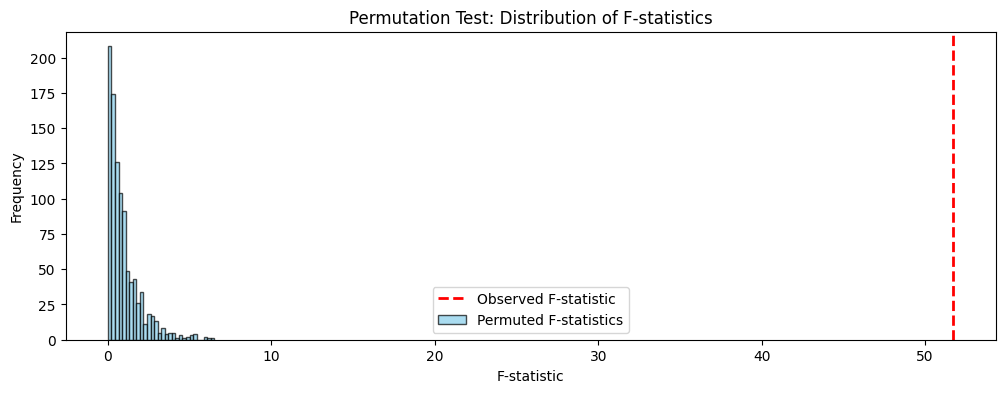

<Figure size 640x480 with 0 Axes>

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize = (12,4))
plt.hist(permuted_f_stats, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add a vertical line for the observed F-statistic
plt.axvline(observed_F_stat, color='red', linestyle='dashed', linewidth=2)

plt.xlabel('F-statistic')
plt.ylabel('Frequency')
plt.title('Permutation Test: Distribution of F-statistics')

plt.legend(['Observed F-statistic', 'Permuted F-statistics'])

plt.show()
plt.tight_layout()

There is a huge discrepancy between observed F and permutated F, and again we reject the null hypothesis in favor for alternative
- Again raises the question: Why is there low correlation in EDA but a lot of evidence that explains otherwise?

##### Pairwise Statistics (mean differences)
- Mean differences: Tell us which `specific` group is different from each other (so 1,3 vs 1,2 vs 2,3)

In [60]:
# Mean differences

def permutation_test_mean_dif(df, level1, level2, num_permutations=1000):
    # Calculate observed mean difference
    mean1 = df[df['level'] == level1]['overall_rating'].mean()
    mean2 = df[df['level'] == level2]['overall_rating'].mean()
    
    observed_mean_dif = abs(mean1 - mean2)

    permuted_mean_difs = np.zeros(num_permutations)
    
    for i in range(num_permutations):
        # Shuffle the 'overall_rating' column
        df['shuffled_rating'] = np.random.permutation(df['overall_rating'].values)
        
        # Calculate the mean difference for the shuffled data
        perm_mean1 = df[df['level'] == level1]['shuffled_rating'].mean()
        perm_mean2 = df[df['level'] == level2]['shuffled_rating'].mean()
        
        permuted_mean_difs[i] = abs(perm_mean1 - perm_mean2)
    
    p_value = np.sum(permuted_mean_difs >= observed_mean_dif) / num_permutations
    
    return observed_mean_dif, p_value


Let's do a pairwise test of all possible combination of level

In [62]:
all_comp = [[1,2],[1,3],[2,3]]

for x,y in all_comp:
    observed_diff, p_value = permutation_test_mean_dif(df, level1=x, level2=y)
    print(f"Comparing {x} and {y}")
    print(f"Observed Mean Difference: {observed_diff}")
    print(f"Permutation-based p-value: {p_value}")

Comparing 1 and 2
Observed Mean Difference: 0.06448057467577817
Permutation-based p-value: 0.0
Comparing 1 and 3
Observed Mean Difference: 0.059328763975325494
Permutation-based p-value: 0.0
Comparing 2 and 3
Observed Mean Difference: 0.005151810700452675
Permutation-based p-value: 0.351


- We reject the null hypothesis only for the difference between level 1-2 and 1-3.
- Perhaps after a certain promotion to level 2, any further progression dosen't add much to overall rating?
    - Reasoning that after certain duration in company level 2 and 3 have stayed longer and are used to the company. 
    - So they have settled down and so they don't have the novel and volatile experiences? 
    - We can also attribute this to rising social concerns over wages, work hours, and culture at the entry level?

#### 4.3 Chi-Squared Test for Independence <a id='4.3'></a>
- For Postarity purposes, let's see if Chi-squared get's the same as previous
- Assume that if there was no effect, then level and rating would have independence
- Independence implies that our data should be proportionally equal all throughout
- Chi-Squared assesses the deviation from this independent dataset



**** notes: 2 independent to predict depenendent

In [64]:
### Contingency table
contingency_table = pd.crosstab(df['level'], df['overall_rating'])
contingency_table

overall_rating,1,2,3,4,5
level,,,,,
1,2417,3353,9557,13365,10904
2,8107,10760,30269,48100,41000
3,3497,4980,14564,23691,18191


Our test will take into account observed values and expected value (if it were to be independent), calculate those differences squared
- larger difference -> larger chi-square -> smaller p-value -> statistically significant

Significance level will be 0.05

In [65]:
from scipy.stats import chi2_contingency

### Expect:
# Degrees of Freedom: 8 (rows - 1) (col - 1)

# Perform Chi-Squared Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(chi2)
print(dof)
print(f'p-value: {p}')

print('\nExpected Frequencies:')
expected_rounded = pd.DataFrame(expected).round(1)
print(expected_rounded)

248.17222165606887
8
p-value: 4.2038432178641105e-49

Expected Frequencies:
        0        1        2        3        4
0  2287.0   3114.3   8871.6  13889.9  11433.3
1  7984.2  10872.4  30972.2  48491.8  39915.4
2  3749.8   5106.3  14546.2  22774.3  18746.4


A p-value this low of 4.2038432178641105e-49, we reject `𝐻0` in favor of `𝐻1` that there is no independence, so again, job level seems to effect satisfacion
- This is inline with our ANOVA tests

### 5. Industry-Specific Testing <a id = '5'></a>
- Based on Data Analysis in previous section, it seems like some industries have minimal correlation/influence on employee satisfaction (ie tech)
- Let's conduct a hypothesis test for each industry

In [67]:
df_level.groupby('industry').describe()

level                                               \
                      count      mean       std  min  25%  50%  75%  max   
industry                                                                   
Consulting          68540.0  2.181296  0.685330  1.0  2.0  2.0  3.0  3.0   
Consumer Goods       1966.0  2.125127  0.515025  1.0  2.0  2.0  2.0  3.0   
Education            2764.0  1.968162  0.674546  1.0  2.0  2.0  2.0  3.0   
Financial Services  46516.0  2.182389  0.637241  1.0  2.0  2.0  3.0  3.0   
Food                 9251.0  1.479083  0.646212  1.0  1.0  1.0  2.0  3.0   
Healthcare           1550.0  2.023871  0.593768  1.0  2.0  2.0  2.0  3.0   
Hospitality          6925.0  1.981372  0.654783  1.0  2.0  2.0  2.0  3.0   
Media                5778.0  2.132399  0.569509  1.0  2.0  2.0  2.0  3.0   
Pharmaceuticals      1821.0  2.121911  0.634596  1.0  2.0  2.0  3.0  3.0   
Real Estate          2241.0  2.240071  0.610489  1.0  2.0  2.0  3.0  3.0   
Retail              10493.0  1.432002  0.553188  1.0  1.0  1.0  2.0  3.0   
Tech                78729.0  2.165187  0.548700  1.0  2.0  2.0  2.0  3.0   
Telecommunications   6181.0  2.097072  0.529358  1.0  2.0  2.0  2.0  3.0   

                   overall_rating                                               
                            count      mean       std  min  25%  50%  75%  max  
industry                                                                        
Consulting                68540.0  3.747563  1.074178  1.0  3.0  4.0  5.0  5.0  
Consumer Goods             1966.0  4.009664  0.981979  1.0  4.0  4.0  5.0  5.0  
Education                  2764.0  3.743488  1.200062  1.0  3.0  4.0  5.0  5.0  
Financial Services        46516.0  3.624473  1.135497  1.0  3.0  4.0  4.0  5.0  
Food                       9251.0  3.377797  1.228605  1.0  3.0  3.0  4.0  5.0  
Healthcare                 1550.0  3.814839  1.103974  1.0  3.0  4.0  5.0  5.0  
Hospitality                6925.0  3.950758  1.145295  1.0  3.0  4.0  5.0  5.0  
Media                      5778.0  3.662513  1.123798  1.0  3.0  4.0  5.0  5.0  
Pharmaceuticals            1821.0  3.708951  1.159704  1.0  3.0  4.0  5.0  5.0  
Real Estate                2241.0  3.669344  1.206379  1.0  3.0  4.0  5.0  5.0  
Retail                    10493.0  3.530639  1.177183  1.0  3.0  4.0  4.0  5.0  
Tech                      78729.0  3.844098  1.128361  1.0  3.0  4.0  5.0  5.0  
Telecommunications         6181.0  3.631128  1.173947  1.0  3.0  4.0  5.0  5.0

Let's create seperate data frames for all industries with 2 or more firm counts, we will conduct experiment on each industry group later on

In [66]:
industry_dfs = {}

for industry in df['industry'].unique():
    # Filter the dataframe for the specific industry
    temp_df = df[df['industry'] == industry]
    
    # Check if there is more than one unique firm in this industry
    if temp_df['firm'].nunique() > 1:
        industry_dfs[industry] = temp_df

# Count the number of industries in the dictionary
num_industries = len(industry_dfs)
print(f"Number of industries: {num_industries}")

Number of industries: 9


#### ANOVA
- `Two Way ANOVA`
    - Tell us differences between levels and ratings wihtin industry
    - Will also display evidence of interactions, in other words, if level dictating overall rating also depends on industry, or combination of influences -> interactions

- Based off those macro results, we will perform a one way anova for each industry to better see the micro trends and nuances


##### Two Way ANOVA - Testing for Interactions

In [80]:
# Two way ANOVA, testing for interactions (dependency)
model = ols('overall_rating ~ C(level) + C(industry) + C(level):C(industry)', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                             sum_sq        df           F        PR(>F)
C(level)                  17.641120       2.0    7.002232  9.100328e-04
C(industry)             3608.881123      12.0  238.743550  0.000000e+00
C(level):C(industry)     399.973872      24.0   13.230026  5.349301e-53
Residual              305744.102571  242716.0         NaN           NaN


Looking at this anova table we see:

C(industry) (F = 238.743550, p < 0.0001)
- This suggests that the average overall_rating differs significantly across industries.

C(level):C(industry) (F = 13.230026, p = 5.349301e-53):
- The interaction is just as statistically significant, in otherwords, relationship between level and overall rating depends heavily on the industry

Let's dive deeper by performing a One Way ANOVA for each industry

##### Oneway ANOVA for each industry

In [81]:
for industry in industry_dfs:
    temp_df = industry_dfs[industry]
    
    # Fit the model using OLS
    model = ols('overall_rating ~ C(level)', data=temp_df).fit()
    # Perform ANOVA on the fitted model
    anova_table_ind = sm.stats.anova_lm(model, typ=2)
    
    # Print the results
    print(f"Industry: {industry}")
    print(anova_table_ind)
    print("\n")


Industry: Retail
                sum_sq       df          F        PR(>F)
C(level)     46.268241      2.0  16.744271  5.490833e-08
Residual  14493.131169  10490.0        NaN           NaN


Industry: Financial Services
                sum_sq       df         F    PR(>F)
C(level)     33.279256      2.0  12.91201  0.000002
Residual  59941.020339  46513.0       NaN       NaN


Industry: Consulting
                sum_sq       df         F    PR(>F)
C(level)     15.387186      2.0  6.668809  0.001271
Residual  79068.955913  68537.0       NaN       NaN


Industry: Tech
                 sum_sq       df         F    PR(>F)
C(level)       3.551075      2.0  1.394562  0.247948
Residual  100232.909111  78726.0       NaN       NaN


Industry: Telecommunications
               sum_sq      df         F    PR(>F)
C(level)     0.811444     2.0  0.294329  0.745042
Residual  8516.159596  6178.0       NaN       NaN


Industry: Media
               sum_sq      df         F    PR(>F)
C(level)     0.191316

As expected, we are getting different results within industries compared to indsutry-wide testing:

We reject the null hypothesis in most industries, but cannot reject the null hypothesis for Tech, Media, Telecommunication ( > 0.05)
- Suprised consulting and financial services does not fall on the list despite having rather equal ratings amongst each level (EDA), highlights how important significance testing is 
- Let's take a deeper look to using pairwise permutation testing 

#### Permutation Test (Pairwise mean differences)

In [72]:
for industry in industry_dfs:

    temp_df = industry_dfs[industry]

    for x,y in all_comp:
        observed_diff, p_value = permutation_test_mean_dif(temp_df, level1=x, level2=y)
        print(f"Industry: {industry}")
        print(f"Comparing {x} and {y}")
        print(f"Observed Mean Difference: {observed_diff}")
        print(f"Permutation-based p-value: {p_value} \n")

C:\Users\Andre\AppData\Local\Temp\ipykernel_24460\4277658768.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shuffled_rating'] = np.random.permutation(df['overall_rating'].values)


Industry: Retail
Comparing 1 and 2
Observed Mean Difference: 0.1252967562390035
Permutation-based p-value: 0.0 

Industry: Retail
Comparing 1 and 3
Observed Mean Difference: 0.11823358398400297
Permutation-based p-value: 0.08 

Industry: Retail
Comparing 2 and 3
Observed Mean Difference: 0.24353034022300646
Permutation-based p-value: 0.001 

Industry: Financial Services
Comparing 1 and 2
Observed Mean Difference: 0.055688295102701346
Permutation-based p-value: 0.0 

Industry: Financial Services
Comparing 1 and 3
Observed Mean Difference: 0.08804484882823127
Permutation-based p-value: 0.0 

Industry: Financial Services
Comparing 2 and 3
Observed Mean Difference: 0.032356553725529924
Permutation-based p-value: 0.007 

Industry: Consulting
Comparing 1 and 2
Observed Mean Difference: 0.04087752538034772
Permutation-based p-value: 0.0 

Industry: Consulting
Comparing 1 and 3
Observed Mean Difference: 0.04070115993890866
Permutation-based p-value: 0.001 

Industry: Consulting
Comparing 2 and

We start seeing much more variation in p-values once we start analyzing each management level within a particular industry
- In most sectors, (Example, Entry (1) level consulting and food have different satisfaction from both (2) & (3) although those 2 don't deviate from each other)
    - So after a certain level of seniority, seniority does not matter as much?
- Sectors in tech, media, and telecommunications remains the same, we cannot reject hypothesis that management level affects ratings at all
    - Satisfaction level is same throughout all seniority positions
- We  also reject null hypothesis for financial Services and hospitatality services all throughtout
    - implying varying seniority affects overall rating

### 6. Conclusions <a id = '6'></a>

<span style="background-color: #00008B">So to the ultimate question: Does job level affect overall_rating?  `It depends on the industry`</span>

#### General Trends:
- We rejected the null hypothesis that overall rating is same for all management level
- However, there is a limitation as it differs only up to a certain point: we fail to reject the null hypothesis for mean difference between level 2 and 3. 
- Entry level (1) have significantly worse outlooks compared to level (2) and (3) which looks like they come from the same distribution

#### Industry Specific Trends:
- Through two-way ANOVA testing, we see deviations within industries
- Seniority plays less of a role in certain industries like tech, telecommunications and much more in others like finanical services and hospitatlity.
- In some industries we see levels clustered together (so after certain seniority ie pass entry positions or middle management, job satisfaction increase and stagnates)

##### Limits
- Perhaps labeling of jobs was manually done, so small margin of error for mislabling of job positions
- Assumption that most blue collar jobs (without the explicit title of being upper management) are considered entry level
- Lacking firms in some industries, would want to test with more firms in fastfood, retail, and definetenly worth investigating healthcare
- We are working with a filtered dataset with some employees who didn't fill in their job title, so this may not exactly represent population
- Potentially biases for people filling out Glassdoor reviews, more higher reviews than lower?